# Project 1

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
players_info = pd.read_csv("People.csv")
players_info

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,NaN,NaN,NaN,...,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,...,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,...,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,...,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19365,zupofr01,1939.0,8.0,29.0,USA,CA,San Francisco,2005.0,3.0,25.0,...,Zupo,Frank Joseph,182.0,71.0,L,R,1957-07-01,1961-05-09,zupof101,zupofr01
19366,zuvelpa01,1958.0,10.0,31.0,USA,CA,San Mateo,NaN,NaN,NaN,...,Zuvella,Paul,173.0,72.0,R,R,1982-09-04,1991-05-02,zuvep001,zuvelpa01
19367,zuverge01,1924.0,8.0,20.0,USA,MI,Holland,2014.0,9.0,8.0,...,Zuverink,George,195.0,76.0,R,R,1951-04-21,1959-06-15,zuveg101,zuverge01
19368,zwilldu01,1888.0,11.0,2.0,USA,MO,St. Louis,1978.0,3.0,27.0,...,Zwilling,Edward Harrison,160.0,66.0,L,L,1910-08-14,1916-07-12,zwild101,zwilldu01


In [3]:
salary_data = pd.read_csv("Salaries.csv")
salary_data

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000
...,...,...,...,...,...
26423,2016,WAS,NL,strasst01,10400000
26424,2016,WAS,NL,taylomi02,524000
26425,2016,WAS,NL,treinbl01,524900
26426,2016,WAS,NL,werthja01,21733615


In [4]:
player_awards = pd.read_csv("AwardsPlayers.csv")
player_awards

,playerID,awardID,yearID,lgID,tie,notes
0,bondto01,Pitching Triple Crown,1877,NL,NaN,NaN
1,hinespa01,Triple Crown,1878,NL,NaN,NaN
2,heckegu01,Pitching Triple Crown,1884,AA,NaN,NaN
3,radboch01,Pitching Triple Crown,1884,NL,NaN,NaN
4,oneilti01,Triple Crown,1887,AA,NaN,NaN
...,...,...,...,...,...,...
6231,stantmi03,TSN All-Star,2017,NL,NaN,OF
6232,blackch02,TSN All-Star,2017,NL,NaN,OF
6233,ozunama01,TSN All-Star,2017,NL,NaN,OF
6234,scherma01,TSN All-Star,2017,NL,NaN,SP


In [5]:
batting = pd.read_csv("Batting.csv")
batting.columns

Index(['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'G', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH',
       'SF', 'GIDP'],
      dtype='object')

In [6]:
player_awards = player_awards[["playerID", "awardID", "yearID", "lgID"]]
players_info = players_info[["playerID", "weight", "height", "bats", "birthCountry", "nameFirst", "nameLast"]]
batting = batting[["playerID", "yearID", "lgID", "teamID", "H", "AB"]]
players_info = pd.merge(players_info, salary_data, on="playerID")
players_info = pd.merge(players_info, player_awards, on=["playerID", "lgID", "yearID"], how="left")
players_info = pd.merge(players_info, batting, on=["playerID", "lgID", "teamID", "yearID"])
players_info

,playerID,weight,height,bats,birthCountry,nameFirst,nameLast,yearID,teamID,lgID,salary,awardID,H,AB
0,aardsda01,215.0,75.0,R,USA,David,Aardsma,2004,SFN,NL,300000,NaN,0,0
1,aardsda01,215.0,75.0,R,USA,David,Aardsma,2007,CHA,AL,387500,NaN,0,0
2,aardsda01,215.0,75.0,R,USA,David,Aardsma,2008,BOS,AL,403250,NaN,0,1
3,aardsda01,215.0,75.0,R,USA,David,Aardsma,2009,SEA,AL,419000,NaN,0,0
4,aardsda01,215.0,75.0,R,USA,David,Aardsma,2010,SEA,AL,2750000,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26267,zuninmi01,220.0,74.0,R,USA,Mike,Zunino,2015,SEA,AL,523500,NaN,61,350
26268,zupcibo01,220.0,76.0,R,USA,Bob,Zupcic,1991,BOS,AL,100000,NaN,4,25
26269,zupcibo01,220.0,76.0,R,USA,Bob,Zupcic,1992,BOS,AL,109000,NaN,108,392
26270,zupcibo01,220.0,76.0,R,USA,Bob,Zupcic,1993,BOS,AL,222000,NaN,69,286


## The most awarded Puerto Rican player

In [7]:
# Narrow down to Puerto Rican players who have earned awards
PR_players = players_info[players_info.birthCountry == "P.R."]
PR_players = PR_players.dropna(subset="awardID")

# Run a count of awards won by each player and order by number of awards
PR_players_based_on_awards = PR_players.groupby(["playerID"])["awardID"].count().reset_index().sort_values(by="awardID", ascending=False)

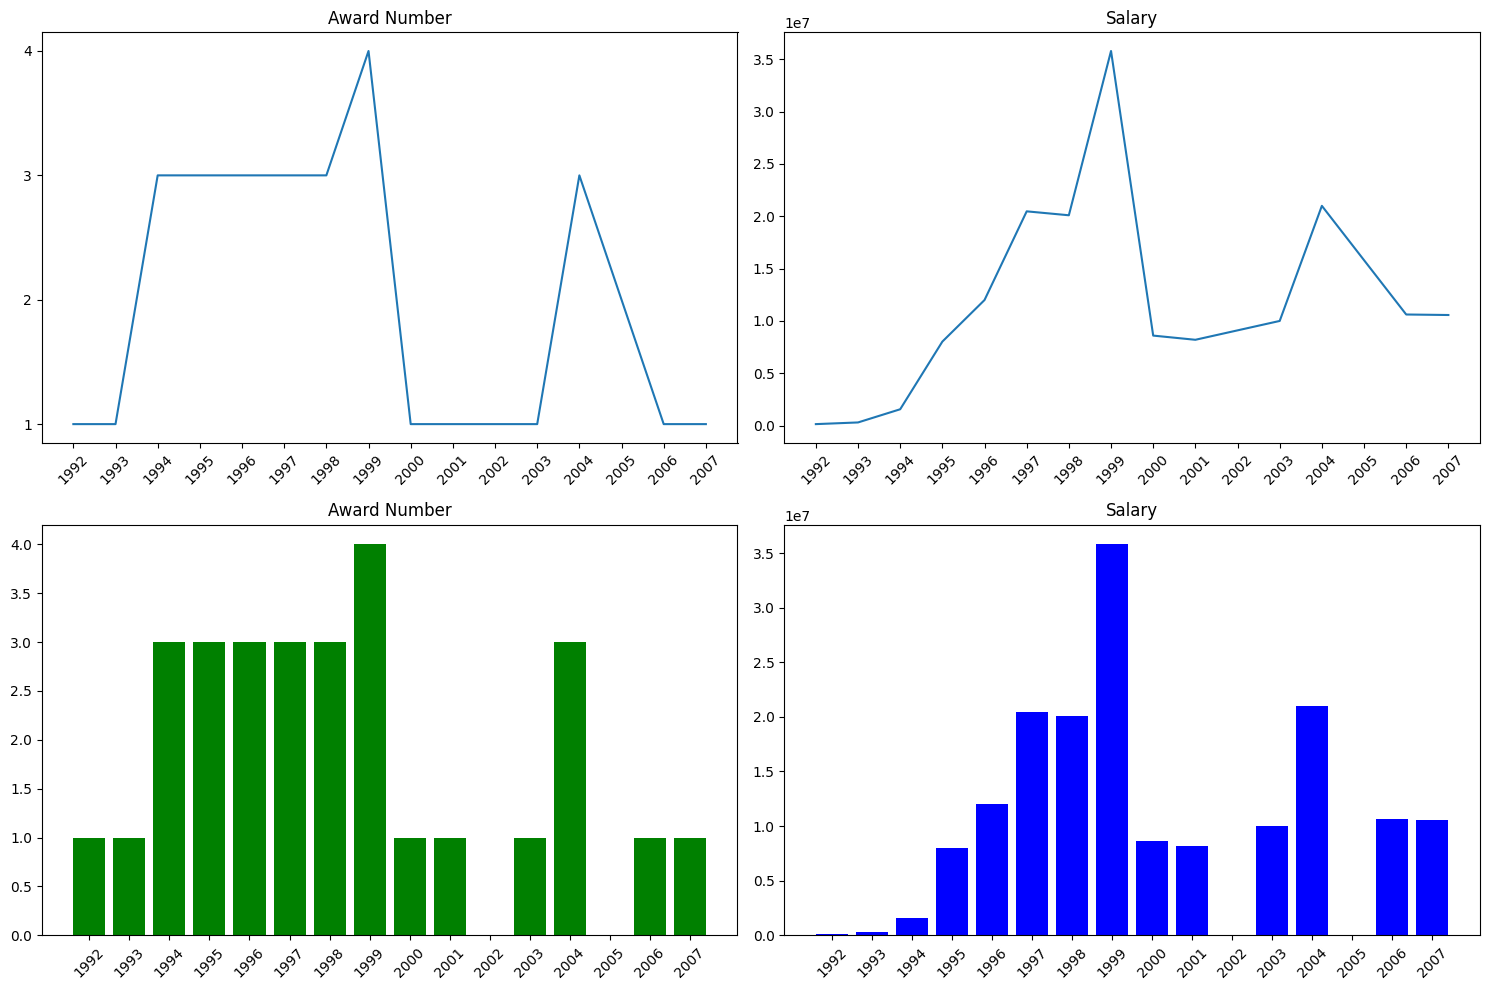

In [8]:
# Pick out the player with the most total awards and get data for awards won each year of their career
player_with_highest_number_of_awards = PR_players_based_on_awards['playerID'].iloc[0]
awards_per_year = PR_players[PR_players.playerID == player_with_highest_number_of_awards]
award_info = awards_per_year.groupby(["yearID"])["awardID"].count().reset_index()

# Find salary information for each year
salary_info = PR_players[PR_players.playerID == player_with_highest_number_of_awards].groupby(["yearID"])["salary"].sum().reset_index()

# Plot findings in two separate ways
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

axs[0, 0].plot(award_info["yearID"], award_info["awardID"])
axs[0, 0].set_title('Award Number')
axs[0, 0].set_xticks(np.arange(award_info["yearID"].min(), award_info["yearID"].max() + 1, 1))
axs[0, 0].set_yticks(np.arange(award_info["awardID"].min(), award_info["awardID"].max() + 1, 1))
axs[0, 0].tick_params(axis='x', rotation=45)


axs[0, 1].plot(salary_info["yearID"], salary_info["salary"])
axs[0, 1].set_title('Salary')
axs[0, 1].set_xticks(np.arange(salary_info["yearID"].min(), salary_info["yearID"].max() + 1, 1))
axs[0, 1].tick_params(axis='x', rotation=45)


axs[1, 0].bar(award_info["yearID"], award_info["awardID"], color='green')  
axs[1, 0].set_title('Award Number')
axs[1, 0].set_xticks(np.arange(award_info["yearID"].min(), award_info["yearID"].max() + 1, 1))
axs[1, 0].tick_params(axis='x', rotation=45)


axs[1, 1].bar(salary_info["yearID"], salary_info["salary"], color='blue') 
axs[1, 1].set_title('Salary')
axs[1, 1].set_xticks(np.arange(salary_info["yearID"].min(), salary_info["yearID"].max() + 1, 1))
axs[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

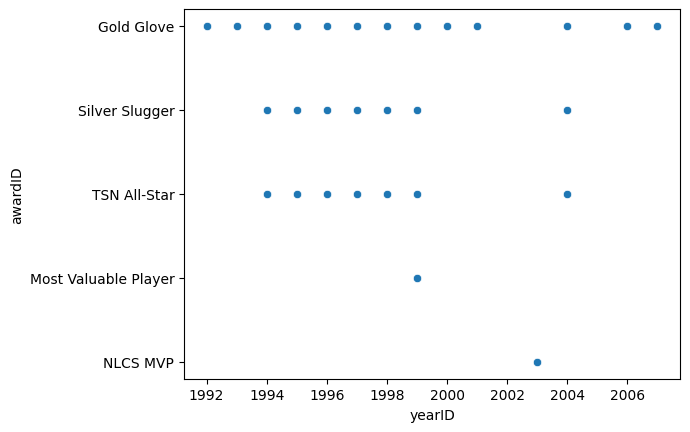

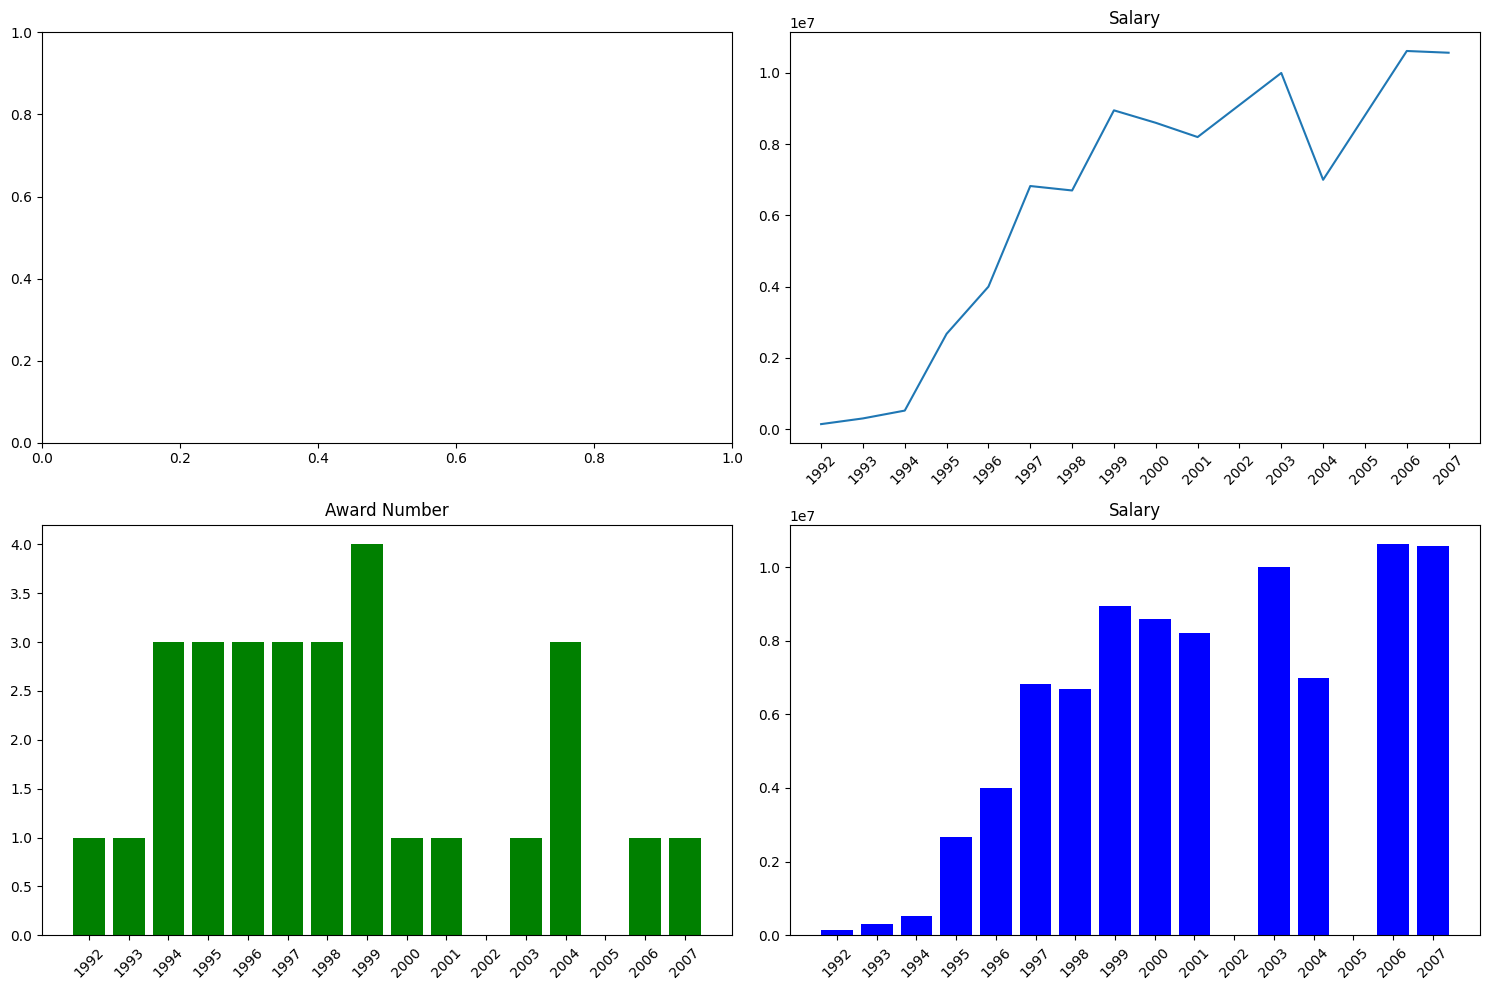

In [9]:
# Recompute salary info, but this time remembering that salaries for each year might be duplicated
salary_info = PR_players[PR_players.playerID == player_with_highest_number_of_awards].groupby(["yearID"])['salary'].first().reset_index()

# Gather info and plot types of awards won each year
awards_of_highest = player_awards[player_awards['playerID'] == player_with_highest_number_of_awards]
sns.scatterplot(x="yearID", y="awardID", data=awards_of_highest)

# Replot salary/award data by year
fig, axs = plt.subplots(2, 2, figsize=(15, 10))


axs[0, 1].plot(salary_info["yearID"], salary_info["salary"])
axs[0, 1].set_title('Salary')
axs[0, 1].set_xticks(np.arange(salary_info["yearID"].min(), salary_info["yearID"].max() + 1, 1))
axs[0, 1].tick_params(axis='x', rotation=45)


axs[1, 0].bar(award_info["yearID"], award_info["awardID"], color='green')  
axs[1, 0].set_title('Award Number')
axs[1, 0].set_xticks(np.arange(award_info["yearID"].min(), award_info["yearID"].max() + 1, 1))
axs[1, 0].tick_params(axis='x', rotation=45)


axs[1, 1].bar(salary_info["yearID"], salary_info["salary"], color='blue') 
axs[1, 1].set_title('Salary')
axs[1, 1].set_xticks(np.arange(salary_info["yearID"].min(), salary_info["yearID"].max() + 1, 1))
axs[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Impact of BMI on Batting Average

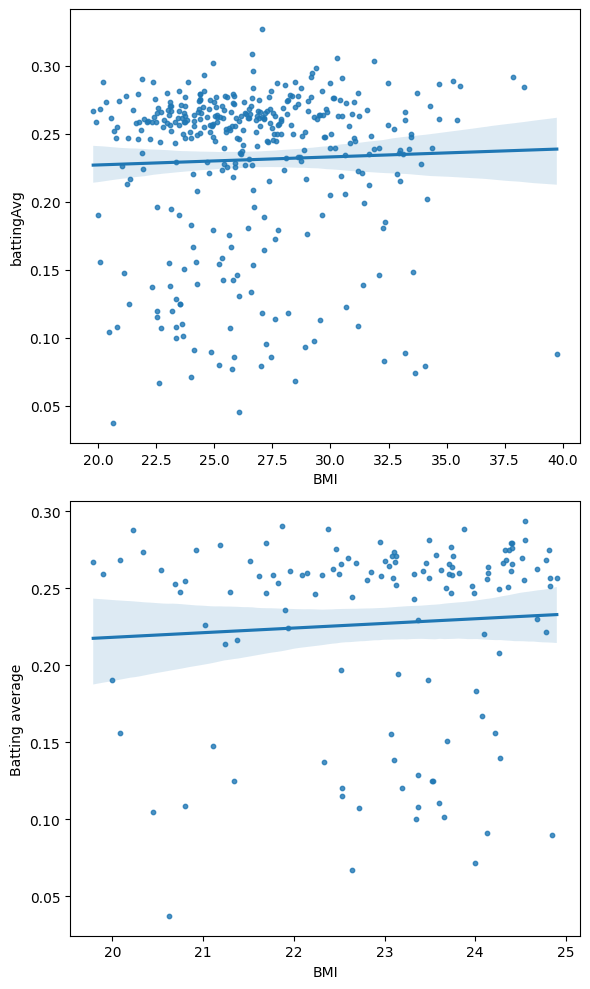

In [10]:
# Gather necessary player info and drop players that may be missing necessary info
BMI_impact_on_run = players_info[["playerID", "teamID", "weight", "height", "H", "AB"]]
BMI_impact_on_run = BMI_impact_on_run.dropna(subset="H")
BMI_impact_on_run = BMI_impact_on_run.dropna(subset="AB")
BMI_impact_on_run = BMI_impact_on_run.dropna(subset="height")
BMI_impact_on_run = BMI_impact_on_run.dropna(subset="playerID")
BMI_impact_on_run = BMI_impact_on_run.dropna(subset="weight")

# Calculate BMIs, then for each, sum the hits and at-bats of players with that BMI and compute a batting average from these sums
BMI_impact_on_run['BMI'] = (BMI_impact_on_run.weight * 703) / (BMI_impact_on_run.height)**2
BMI_impact_on_run = BMI_impact_on_run.groupby('BMI').agg({"H": "sum", "AB": "sum"}).reset_index()
BMI_impact_on_run = BMI_impact_on_run[BMI_impact_on_run['AB'] > 20]
BMI_impact_on_run['battingAvg'] = (BMI_impact_on_run.H / BMI_impact_on_run.AB)
BMI_impact_on_run = BMI_impact_on_run.dropna(subset="battingAvg")

# Plot a linear regression to see if there is a relationship between the two
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(6, 10))


plt.subplot(2, 1, 1)
sns.regplot(data=BMI_impact_on_run, x="BMI", y="battingAvg", scatter_kws={'s': 10})

# Plot a second one with players within the "normal range" of BMI
BMI_impact_on_run = BMI_impact_on_run[BMI_impact_on_run['BMI'] >= 18.5]
BMI_impact_on_run = BMI_impact_on_run[BMI_impact_on_run['BMI'] <= 24.9]

plt.subplot(2, 1, 2)
sns.regplot(data=BMI_impact_on_run, x="BMI", y="battingAvg", scatter_kws={'s': 10})

plt.ylabel("Batting average")

plt.tight_layout()

plt.show()

## Expected pay for each batting style in both leagues

In [11]:
# Split the players into each league
national_league = players_info[(players_info.lgID == "NL") & (players_info.yearID > 2012)]
american_league = players_info[(players_info.lgID == "AL") & (players_info.yearID > 2012)]

<Axes: xlabel='Batting Style', ylabel='Salary'>

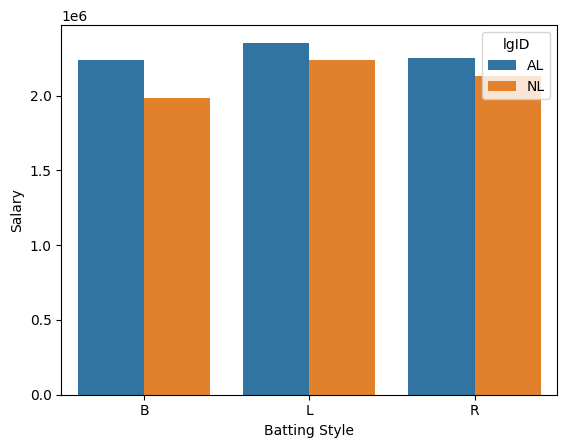

In [12]:
# Compute the average salary for each combination of batting style and league in recent years
bats_salary = players_info[players_info.yearID > 2012]
bats_salary = players_info.groupby(["bats", 'lgID'])["salary"].mean().reset_index()

# Plot the results
plt.ylabel("Salary")
plt.xlabel("Batting Style")

sns.barplot(x='bats', y='salary', hue='lgID', data=bats_salary)

## Money $pent on player salaries in each league

In [13]:
# Split players between the two leagues
national_league = players_info[(players_info.lgID == "NL")]
american_league = players_info[(players_info.lgID == "AL")]

national_league_spent_money = national_league[["yearID" , "salary"]]
american_league_spent_money = american_league[["yearID" , "salary"]]

In [14]:
# Compute the total salary expenditure per year in each league
national_league_spent_money = national_league_spent_money.groupby('yearID')['salary'].sum()
american_league_spent_money = american_league_spent_money.groupby('yearID')['salary'].sum()
national_league_spent_money = national_league_spent_money.reset_index()
american_league_spent_money = american_league_spent_money.reset_index()

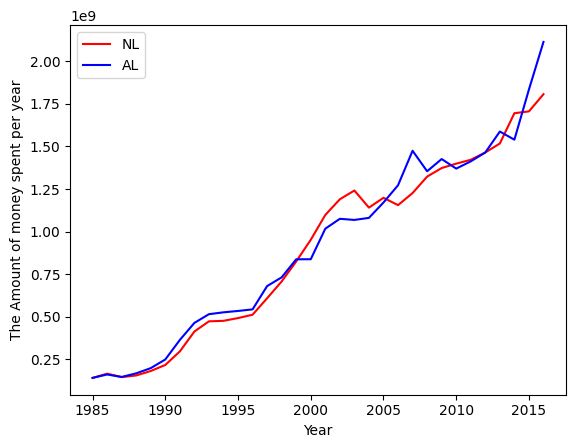

In [15]:
# plot the results
national_league_spent_money.columns = ["Year", "NA_spent_salary"]
american_league_spent_money.columns = ["Year", "AL_spent_salary"]
sns.lineplot(x="Year", y="NA_spent_salary", data=national_league_spent_money, color='red', label='NL')
sns.lineplot(x="Year", y="AL_spent_salary", data=american_league_spent_money, color='blue', label='AL')
plt.xlabel("Year")
plt.ylabel("The Amount of money spent per year")
plt.show()

## Expensive foreign-born players

In [16]:
# Find players that played starting in 1990
among_years_1990_2014 = salary_data[(salary_data.yearID >= 1990) & (salary_data.yearID < 2014)]
among_years_1990_2014.reset_index()

,index,yearID,teamID,lgID,playerID,salary
0,3289,1990,ATL,NL,bellmi01,100000
1,3290,1990,ATL,NL,blausje01,180000
2,3291,1990,ATL,NL,boevejo01,215000
3,3292,1990,ATL,NL,castito02,100000
4,3293,1990,ATL,NL,claryma01,125000
...,...,...,...,...,...,...
20662,23951,2013,WAS,NL,suzukku01,6487500
20663,23952,2013,WAS,NL,tracych01,1000000
20664,23953,2013,WAS,NL,werthja01,16571429
20665,23954,2013,WAS,NL,zimmejo02,5350000


In [17]:
# Of the players, single out the ones that ever received a salary over $10,000,000 and who were born outside the US
expensive_players = players_info[players_info.salary > 10000000]
expensive_players_not_USA = expensive_players[expensive_players["birthCountry"] != "USA"]

In [18]:
# Divide the players by birth country
unique_non_US_player = expensive_players_not_USA.drop_duplicates(subset=["playerID", "birthCountry"])
countries_count = unique_non_US_player.groupby('birthCountry')['playerID'].count().reset_index()
countries_count.columns = ['Countries', 'Count']
countries_count = countries_count.sort_values(ascending=False, by='Count')

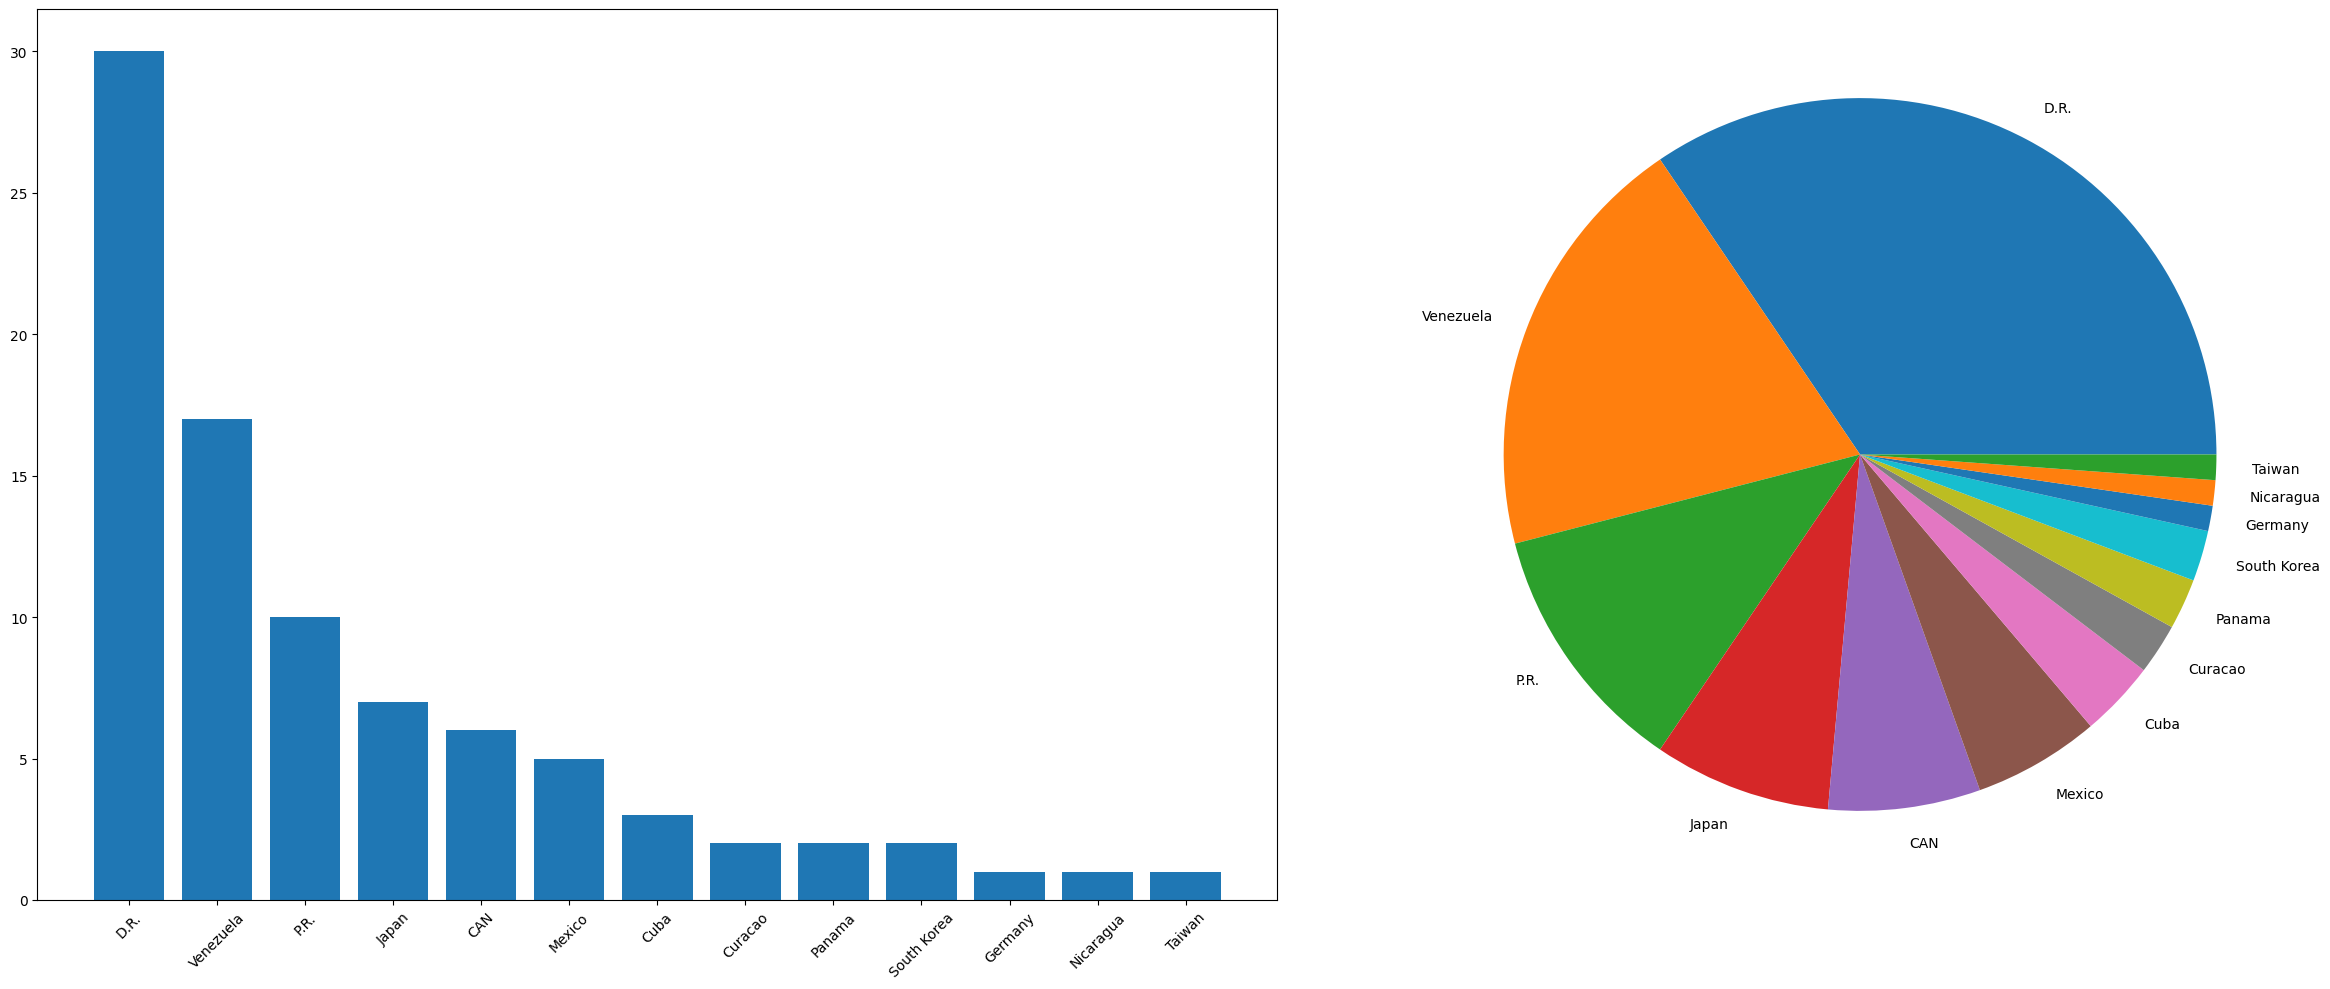

In [19]:
# Plot the findings
fig, axs = plt.subplots(1, 2, figsize=(25, 10))
axs[0].bar(countries_count["Countries"], countries_count["Count"])
axs[0].tick_params(axis='x', rotation=45)
axs[1].pie(countries_count["Count"], labels=countries_count["Countries"])
plt.tight_layout()
plt.show()

## Expected starting salaries for foreigners

,birthCountry,salary
17,Japan,2.832473e+06
8,Cuba,1.565025e+06
26,South Korea,9.437741e+05
28,Taiwan,8.111958e+05
5,Brazil,5.321250e+05
24,Saudi Arabia,5.225000e+05
15,Italy,4.813000e+05
14,Indonesia,3.815000e+05
2,Australia,3.683333e+05
20,Nicaragua,3.611143e+05


<Axes: xlabel='birthCountry', ylabel='salary'>

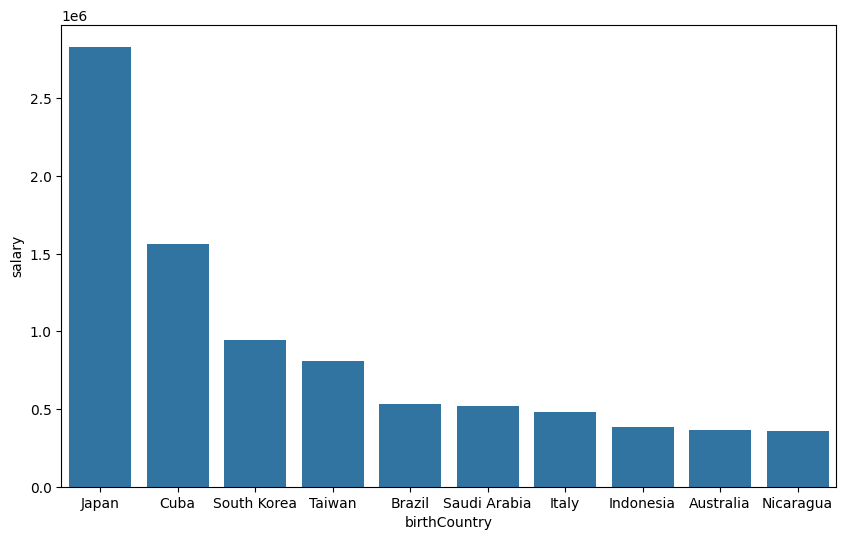

In [20]:
players_info = pd.read_csv("People.csv")

# Find each player's starting year and then limit the data to the first year for players that started since 1990
starting_salary = salary_data.groupby('playerID')['yearID'].min().reset_index()
among_years_1990_2014 = starting_salary[(starting_salary.yearID >= 1990) & (starting_salary.yearID < 2014)]
among_years_1990_2014.reset_index()
starting_salary = pd.merge(salary_data, starting_salary, on=['playerID', 'yearID'])
starting_salary.drop_duplicates('playerID')
starting_salary = pd.merge(starting_salary, players_info, on='playerID')

# Limit the data to foreigners and then find the average salary of players from each country in their starting year
starting_salary = starting_salary[starting_salary['birthCountry'] != 'USA']
starting_salary = starting_salary.groupby('birthCountry')['salary'].mean().reset_index()
starting_salary = starting_salary.sort_values(ascending=False, by='salary')

# Show the results
display(starting_salary)
plt.figure(figsize=(10, 6))

sns.barplot(x='birthCountry', y='salary', data=starting_salary.head(10))